In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
df = pd.read_csv('train_transaction.csv')
df.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
numerical_feature  = list(df.select_dtypes(exclude=['object']).columns)
numerical_feature

['TransactionID',
 'isFraud',
 'TransactionDT',
 'TransactionAmt',
 'card1',
 'card2',
 'card3',
 'card5',
 'addr1',
 'addr2',
 'dist1',
 'dist2',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'C6',
 'C7',
 'C8',
 'C9',
 'C10',
 'C11',
 'C12',
 'C13',
 'C14',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'D6',
 'D7',
 'D8',
 'D9',
 'D10',
 'D11',
 'D12',
 'D13',
 'D14',
 'D15',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'V29',
 'V30',
 'V31',
 'V32',
 'V33',
 'V34',
 'V35',
 'V36',
 'V37',
 'V38',
 'V39',
 'V40',
 'V41',
 'V42',
 'V43',
 'V44',
 'V45',
 'V46',
 'V47',
 'V48',
 'V49',
 'V50',
 'V51',
 'V52',
 'V53',
 'V54',
 'V55',
 'V56',
 'V57',
 'V58',
 'V59',
 'V60',
 'V61',
 'V62',
 'V63',
 'V64',
 'V65',
 'V66',
 'V67',
 'V68',
 'V69',
 'V70',
 'V71',
 'V72',
 'V73',
 'V74',
 'V75',
 'V76',
 'V77',
 'V78',
 'V79',
 'V80',
 'V81',


In [4]:
len(numerical_feature)

380

In [5]:
serial_feature = []
discrete_feature = []
unique_feature = []
for fea in numerical_feature:
    temp = df[fea].nunique()
    if temp == 1:
        unique_feature.append(fea) 
    elif temp <= 10:
        discrete_feature.append(fea)
    else:
        serial_feature.append(fea)

In [6]:
serial_feature

['TransactionID',
 'TransactionDT',
 'TransactionAmt',
 'card1',
 'card2',
 'card3',
 'card5',
 'addr1',
 'addr2',
 'dist1',
 'dist2',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'C6',
 'C7',
 'C8',
 'C9',
 'C10',
 'C11',
 'C12',
 'C13',
 'C14',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'D6',
 'D7',
 'D8',
 'D9',
 'D10',
 'D11',
 'D12',
 'D13',
 'D14',
 'D15',
 'V16',
 'V17',
 'V18',
 'V20',
 'V23',
 'V24',
 'V26',
 'V32',
 'V34',
 'V37',
 'V38',
 'V39',
 'V40',
 'V44',
 'V45',
 'V55',
 'V56',
 'V58',
 'V59',
 'V60',
 'V62',
 'V72',
 'V77',
 'V78',
 'V80',
 'V81',
 'V86',
 'V87',
 'V95',
 'V96',
 'V97',
 'V98',
 'V99',
 'V100',
 'V101',
 'V102',
 'V103',
 'V104',
 'V105',
 'V106',
 'V123',
 'V124',
 'V125',
 'V126',
 'V127',
 'V128',
 'V129',
 'V130',
 'V131',
 'V132',
 'V133',
 'V134',
 'V135',
 'V136',
 'V137',
 'V138',
 'V139',
 'V140',
 'V143',
 'V144',
 'V145',
 'V146',
 'V147',
 'V148',
 'V149',
 'V150',
 'V151',
 'V152',
 'V153',
 'V154',
 'V155',
 'V156',
 'V157',
 'V158',
 'V159',
 'V160',


In [7]:
discrete_feature

['isFraud',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V19',
 'V21',
 'V22',
 'V25',
 'V27',
 'V28',
 'V29',
 'V30',
 'V31',
 'V33',
 'V35',
 'V36',
 'V41',
 'V42',
 'V43',
 'V46',
 'V47',
 'V48',
 'V49',
 'V50',
 'V51',
 'V52',
 'V53',
 'V54',
 'V57',
 'V61',
 'V63',
 'V64',
 'V65',
 'V66',
 'V67',
 'V68',
 'V69',
 'V70',
 'V71',
 'V73',
 'V74',
 'V75',
 'V76',
 'V79',
 'V82',
 'V83',
 'V84',
 'V85',
 'V88',
 'V89',
 'V90',
 'V91',
 'V92',
 'V93',
 'V94',
 'V107',
 'V108',
 'V109',
 'V110',
 'V111',
 'V112',
 'V113',
 'V114',
 'V115',
 'V116',
 'V117',
 'V118',
 'V119',
 'V120',
 'V121',
 'V122',
 'V141',
 'V142',
 'V173',
 'V174',
 'V194',
 'V240',
 'V241',
 'V260',
 'V286',
 'V305']

In [8]:
for f in discrete_feature:
    print(f, 'Category Count：', df[f].nunique())

isFraud Category Count： 2
V1 Category Count： 2
V2 Category Count： 9
V3 Category Count： 10
V4 Category Count： 7
V5 Category Count： 7
V6 Category Count： 10
V7 Category Count： 10
V8 Category Count： 9
V9 Category Count： 9
V10 Category Count： 5
V11 Category Count： 6
V12 Category Count： 4
V13 Category Count： 7
V14 Category Count： 2
V15 Category Count： 8
V19 Category Count： 8
V21 Category Count： 6
V22 Category Count： 9
V25 Category Count： 7
V27 Category Count： 4
V28 Category Count： 4
V29 Category Count： 6
V30 Category Count： 8
V31 Category Count： 8
V33 Category Count： 7
V35 Category Count： 4
V36 Category Count： 6
V41 Category Count： 2
V42 Category Count： 9
V43 Category Count： 9
V46 Category Count： 7
V47 Category Count： 9
V48 Category Count： 6
V49 Category Count： 6
V50 Category Count： 6
V51 Category Count： 7
V52 Category Count： 9
V53 Category Count： 6
V54 Category Count： 7
V57 Category Count： 7
V61 Category Count： 7
V63 Category Count： 8
V64 Category Count： 8
V65 Category Count： 2
V66 Category

In [9]:
unique_feature

[]

In [10]:
category_feature = list(filter(lambda x: x not in numerical_feature,list(df.columns)))
category_feature

['ProductCD',
 'card4',
 'card6',
 'P_emaildomain',
 'R_emaildomain',
 'M1',
 'M2',
 'M3',
 'M4',
 'M5',
 'M6',
 'M7',
 'M8',
 'M9']

In [11]:
df[category_feature]

,ProductCD,card4,card6,P_emaildomain,R_emaildomain,M1,M2,M3,M4,M5,M6,M7,M8,M9
0,W,discover,credit,NaN,NaN,T,T,T,M2,F,T,NaN,NaN,NaN
1,W,mastercard,credit,gmail.com,NaN,NaN,NaN,NaN,M0,T,T,NaN,NaN,NaN
2,W,visa,debit,outlook.com,NaN,T,T,T,M0,F,F,F,F,F
3,W,mastercard,debit,yahoo.com,NaN,NaN,NaN,NaN,M0,T,F,NaN,NaN,NaN
4,H,mastercard,credit,gmail.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,W,visa,debit,NaN,NaN,T,T,T,M0,T,F,F,F,T
590536,W,mastercard,debit,gmail.com,NaN,T,F,F,M0,F,T,F,F,F
590537,W,mastercard,debit,gmail.com,NaN,T,F,F,NaN,NaN,T,NaN,NaN,NaN
590538,W,mastercard,debit,aol.com,NaN,T,T,T,M0,F,T,NaN,NaN,NaN


In [12]:
df.drop(['P_emaildomain','R_emaildomain'],axis=1,inplace=True)

In [13]:
label_encoder = LabelEncoder()
df['ProductCD'] = label_encoder.fit_transform(df['ProductCD'])
df['card4'] = label_encoder.fit_transform(df['card4'])
df['card6'] = label_encoder.fit_transform(df['card6'])
df['M1'] = label_encoder.fit_transform(df['M1'])
df['M2'] = label_encoder.fit_transform(df['M2'])
df['M3'] = label_encoder.fit_transform(df['M3'])
df['M4'] = label_encoder.fit_transform(df['M4'])
df['M5'] = label_encoder.fit_transform(df['M5'])
df['M6'] = label_encoder.fit_transform(df['M6'])
df['M7'] = label_encoder.fit_transform(df['M7'])
df['M8'] = label_encoder.fit_transform(df['M8'])
df['M9'] = label_encoder.fit_transform(df['M9'])

In [14]:
df

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.50,4,13926,NaN,150.0,1,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.00,4,2755,404.0,150.0,2,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.00,4,4663,490.0,150.0,3,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.00,4,18132,567.0,150.0,2,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.00,1,4497,514.0,150.0,2,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,3577535,0,15811047,49.00,4,6550,NaN,150.0,3,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590536,3577536,0,15811049,39.50,4,10444,225.0,150.0,2,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590537,3577537,0,15811079,30.95,4,12037,595.0,150.0,2,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590538,3577538,0,15811088,117.00,4,7826,481.0,150.0,2,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
df.drop(['TransactionDT','TransactionID'],axis=1,inplace=True)

In [16]:
df

,isFraud,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,0,68.50,4,13926,NaN,150.0,1,142.0,1,315.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,29.00,4,2755,404.0,150.0,2,102.0,1,325.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,59.00,4,4663,490.0,150.0,3,166.0,2,330.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,50.00,4,18132,567.0,150.0,2,117.0,2,476.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,50.00,1,4497,514.0,150.0,2,102.0,1,420.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,0,49.00,4,6550,NaN,150.0,3,226.0,2,272.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590536,0,39.50,4,10444,225.0,150.0,2,224.0,2,204.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590537,0,30.95,4,12037,595.0,150.0,2,224.0,2,231.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590538,0,117.00,4,7826,481.0,150.0,2,224.0,2,387.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
X_missing = df.drop(['isFraud'], axis=1)

In [18]:
missing = X_missing.isna().sum()
missing = pd.DataFrame(data={'Feature': missing.index, 'Number of Missing Values': missing.values})

In [19]:
missing = missing[~missing['Number of Missing Values'].isin([0])]

In [20]:
missing['Missing Percentage'] = missing['Number of Missing Values'] / X_missing.shape[0]
missing

,Feature,Number of Missing Values,Missing Percentage
3,card2,8933,0.015127
4,card3,1565,0.002650
6,card5,4259,0.007212
8,addr1,65706,0.111264
9,addr2,65706,0.111264
...,...,...,...
384,V335,508189,0.860550
385,V336,508189,0.860550
386,V337,508189,0.860550
387,V338,508189,0.860550


In [21]:
further = missing.get("Feature") 
bl = missing.get("Missing Percentage") 

drop_further = [i for i, j in zip(further, bl) if j > 0.5]

print(len(drop_further))  
print(drop_further)

169
['dist1', 'dist2', 'D5', 'D6', 'D7', 'D8', 'D9', 'D12', 'D13', 'D14', 'V138', 'V139', 'V140', 'V141', 'V142', 'V143', 'V144', 'V145', 'V146', 'V147', 'V148', 'V149', 'V150', 'V151', 'V152', 'V153', 'V154', 'V155', 'V156', 'V157', 'V158', 'V159', 'V160', 'V161', 'V162', 'V163', 'V164', 'V165', 'V166', 'V167', 'V168', 'V169', 'V170', 'V171', 'V172', 'V173', 'V174', 'V175', 'V176', 'V177', 'V178', 'V179', 'V180', 'V181', 'V182', 'V183', 'V184', 'V185', 'V186', 'V187', 'V188', 'V189', 'V190', 'V191', 'V192', 'V193', 'V194', 'V195', 'V196', 'V197', 'V198', 'V199', 'V200', 'V201', 'V202', 'V203', 'V204', 'V205', 'V206', 'V207', 'V208', 'V209', 'V210', 'V211', 'V212', 'V213', 'V214', 'V215', 'V216', 'V217', 'V218', 'V219', 'V220', 'V221', 'V222', 'V223', 'V224', 'V225', 'V226', 'V227', 'V228', 'V229', 'V230', 'V231', 'V232', 'V233', 'V234', 'V235', 'V236', 'V237', 'V238', 'V239', 'V240', 'V241', 'V242', 'V243', 'V244', 'V245', 'V246', 'V247', 'V248', 'V249', 'V250', 'V251', 'V252', 'V253'

In [22]:
df.drop(drop_further,axis=1,inplace=True)

In [23]:
df

,isFraud,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,...,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
0,0,68.50,4,13926,NaN,150.0,1,142.0,1,315.0,...,0.0,0.000000,0.000000,0.000000,0.0,117.0,0.0,0.000000,0.000000,0.000000
1,0,29.00,4,2755,404.0,150.0,2,102.0,1,325.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
2,0,59.00,4,4663,490.0,150.0,3,166.0,2,330.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
3,0,50.00,4,18132,567.0,150.0,2,117.0,2,476.0,...,135.0,0.000000,0.000000,0.000000,50.0,1404.0,790.0,0.000000,0.000000,0.000000
4,0,50.00,1,4497,514.0,150.0,2,102.0,1,420.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,0,49.00,4,6550,NaN,150.0,3,226.0,2,272.0,...,0.0,47.950001,47.950001,47.950001,0.0,0.0,0.0,0.000000,0.000000,0.000000
590536,0,39.50,4,10444,225.0,150.0,2,224.0,2,204.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
590537,0,30.95,4,12037,595.0,150.0,2,224.0,2,231.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
590538,0,117.00,4,7826,481.0,150.0,2,224.0,2,387.0,...,117.0,317.500000,669.500000,317.500000,0.0,2234.0,0.0,0.000000,0.000000,0.000000


In [24]:
df.duplicated().sum()

15059

In [25]:
df.drop_duplicates(inplace=True)

In [26]:
df

,isFraud,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,...,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
0,0,68.50,4,13926,NaN,150.0,1,142.0,1,315.0,...,0.0,0.000000,0.000000,0.000000,0.0,117.0,0.0,0.000000,0.000000,0.000000
1,0,29.00,4,2755,404.0,150.0,2,102.0,1,325.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
2,0,59.00,4,4663,490.0,150.0,3,166.0,2,330.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
3,0,50.00,4,18132,567.0,150.0,2,117.0,2,476.0,...,135.0,0.000000,0.000000,0.000000,50.0,1404.0,790.0,0.000000,0.000000,0.000000
4,0,50.00,1,4497,514.0,150.0,2,102.0,1,420.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,0,49.00,4,6550,NaN,150.0,3,226.0,2,272.0,...,0.0,47.950001,47.950001,47.950001,0.0,0.0,0.0,0.000000,0.000000,0.000000
590536,0,39.50,4,10444,225.0,150.0,2,224.0,2,204.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
590537,0,30.95,4,12037,595.0,150.0,2,224.0,2,231.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
590538,0,117.00,4,7826,481.0,150.0,2,224.0,2,387.0,...,117.0,317.500000,669.500000,317.500000,0.0,2234.0,0.0,0.000000,0.000000,0.000000


In [27]:
numerical_feature_corr=df.columns

<Axes: >

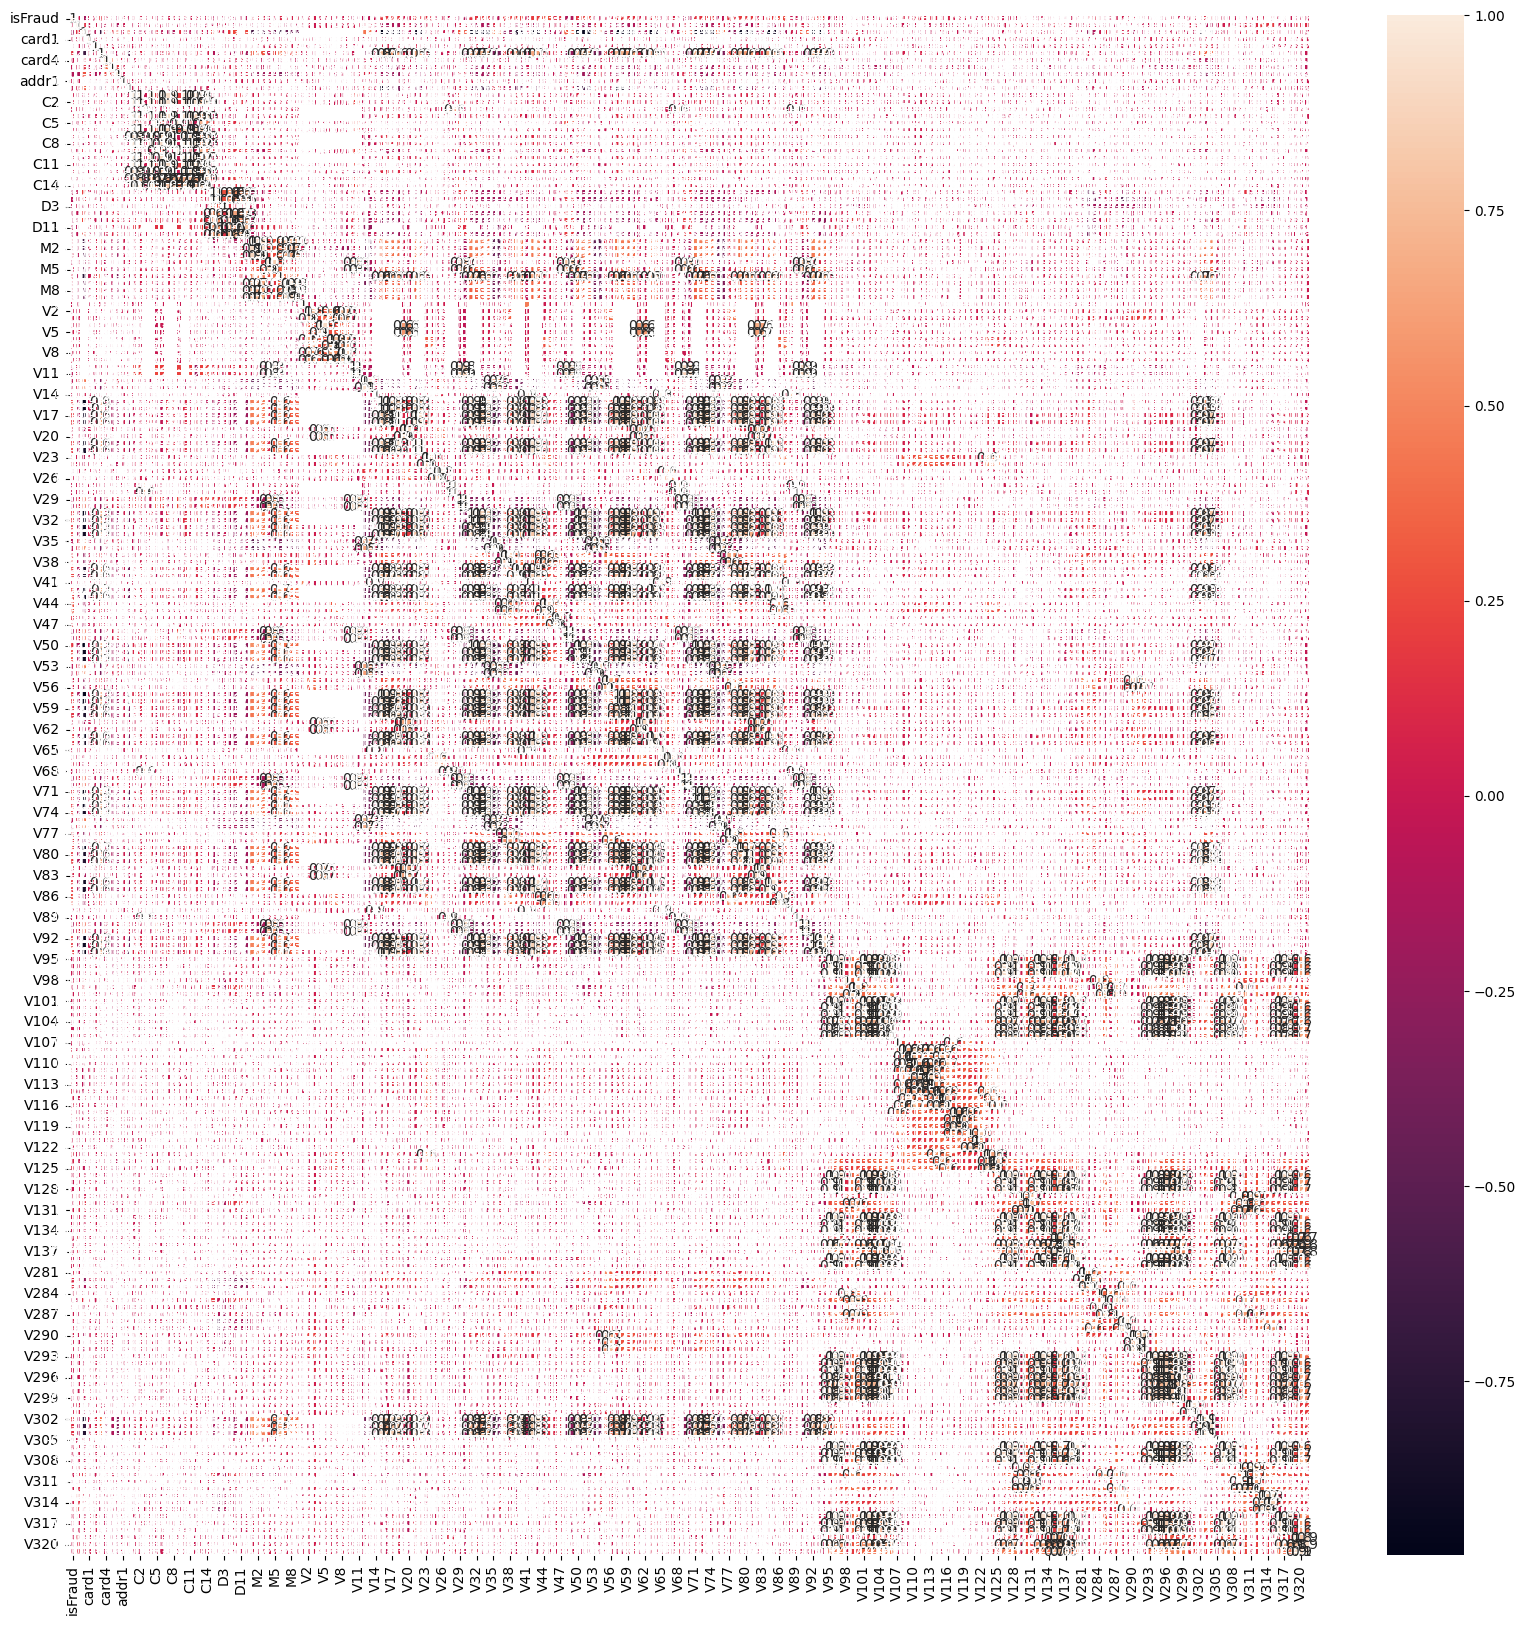

In [28]:
f, ax = plt.subplots(1,1, figsize = (20,20))
cor = df[numerical_feature_corr].corr()
sns.heatmap(cor, annot = True, linewidth = 0.2, linecolor = "white", ax = ax, fmt =".1g" )

In [29]:
correlation_matrix = df.corr()
correlation_matrix

,isFraud,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,...,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
isFraud,1.000000,0.010541,-0.165017,-0.014061,0.004666,0.157888,-0.003798,-0.033789,-0.100814,0.005710,...,0.036742,0.040683,0.037614,0.047483,-0.003166,0.004766,0.000761,-0.000157,0.004614,0.001385
TransactionAmt,0.010541,1.000000,0.143281,-0.004760,0.017510,-0.108344,-0.024598,0.003215,-0.131285,-0.007453,...,0.106012,0.189331,0.146996,0.175791,0.012795,0.010233,0.013087,0.128225,0.103237,0.120419
ProductCD,-0.165017,0.143281,1.000000,0.003324,-0.088393,-0.648274,0.085806,0.148091,0.283450,-0.021652,...,0.086391,0.075790,0.098106,0.084371,-0.007123,-0.014852,-0.008908,0.004255,0.008528,0.005452
card1,-0.014061,-0.004760,0.003324,1.000000,0.006216,-0.000414,0.046376,-0.091791,0.016165,0.019573,...,0.005806,0.001758,0.012064,0.000470,0.046693,0.051600,0.052833,0.009057,0.036707,0.026139
card2,0.004666,0.017510,-0.088393,0.006216,1.000000,0.019696,0.026208,0.030550,-0.126780,0.031523,...,0.002677,0.000424,0.005411,0.002062,0.030105,0.032771,0.033602,0.016136,0.031128,0.026299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
V317,0.004766,0.010233,-0.014852,0.051600,0.032771,-0.016344,-0.036000,-0.094740,-0.078553,0.014558,...,0.230134,0.048391,0.186926,0.046709,0.910549,1.000000,0.970187,0.133109,0.592712,0.381218
V318,0.000761,0.013087,-0.008908,0.052833,0.033602,-0.014935,-0.043505,-0.100083,-0.078780,0.016105,...,0.239307,0.054239,0.195063,0.050504,0.938408,0.970187,1.000000,0.144839,0.619632,0.410370
V319,-0.000157,0.128225,0.004255,0.009057,0.016136,-0.014176,-0.012348,-0.019237,-0.040690,0.005442,...,0.063092,0.037519,0.049671,0.031587,0.136180,0.133109,0.144839,1.000000,0.788202,0.921933
V320,0.004614,0.103237,0.008528,0.036707,0.031128,-0.023613,-0.030680,-0.068238,-0.069477,0.010754,...,0.208020,0.065968,0.163660,0.063375,0.551244,0.592712,0.619632,0.788202,1.000000,0.937487


In [30]:
negative_corr_fields = correlation_matrix["isFraud"][correlation_matrix["isFraud"] < 0].index

In [31]:
df.drop(columns=negative_corr_fields,inplace=True)

In [32]:
df

,isFraud,TransactionAmt,card2,card3,addr1,C1,C2,C4,C6,C7,...,V310,V311,V312,V313,V314,V315,V317,V318,V320,V321
0,0,68.50,NaN,150.0,315.0,1.0,1.0,0.0,1.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,117.0,0.0,0.000000,0.000000
1,0,29.00,404.0,150.0,325.0,1.0,1.0,0.0,1.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
2,0,59.00,490.0,150.0,330.0,1.0,1.0,0.0,1.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
3,0,50.00,567.0,150.0,476.0,2.0,5.0,0.0,4.0,0.0,...,354.000000,0.0,135.0,0.000000,0.000000,0.000000,1404.0,790.0,0.000000,0.000000
4,0,50.00,514.0,150.0,420.0,1.0,1.0,0.0,1.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,0,49.00,NaN,150.0,272.0,2.0,1.0,0.0,0.0,0.0,...,47.950001,0.0,0.0,47.950001,47.950001,47.950001,0.0,0.0,0.000000,0.000000
590536,0,39.50,225.0,150.0,204.0,1.0,1.0,0.0,1.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
590537,0,30.95,595.0,150.0,231.0,1.0,1.0,0.0,1.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
590538,0,117.00,481.0,150.0,387.0,1.0,1.0,0.0,3.0,0.0,...,669.500000,0.0,117.0,317.500000,669.500000,317.500000,2234.0,0.0,0.000000,0.000000


In [33]:
def getHighRelatedFeatureDf(corr_matrix, corr_threshold):
    highRelatedFeatureDf = pd.DataFrame(corr_matrix[corr_matrix>corr_threshold].stack().reset_index())
    highRelatedFeatureDf.rename({'level_0':'feature_x', 'level_1':'feature_y', 0:'corr'}, axis=1, inplace=True)
    highRelatedFeatureDf = highRelatedFeatureDf[highRelatedFeatureDf.feature_x != highRelatedFeatureDf.feature_y]
    highRelatedFeatureDf['feature_pair_key'] = highRelatedFeatureDf.loc[:,['feature_x', 'feature_y']].apply(lambda r:'#'.join(np.sort(r.values)), axis=1)
    highRelatedFeatureDf.drop_duplicates(subset=['feature_pair_key'],inplace=True)
    highRelatedFeatureDf.drop(['feature_pair_key'], axis=1, inplace=True)
    return highRelatedFeatureDf

getHighRelatedFeatureDf(df.corr(),0.6)

,feature_x,feature_y,corr
4,card3,V15,0.752793
5,card3,V16,0.737891
6,card3,V17,0.620886
7,card3,V18,0.612945
8,card3,V21,0.640060
...,...,...,...
2043,V313,V315,0.918324
2046,V314,V315,0.839683
2058,V317,V318,0.970187
2068,V318,V320,0.619632


In [34]:
numerical_feature_a  = list(df.select_dtypes(exclude=['object']).columns)
df[numerical_feature_a] = df[numerical_feature_a].fillna(df[numerical_feature_a].median())

In [35]:
X_missing_a = df.drop(['isFraud'], axis=1)

missing_a = X_missing_a.isna().sum()
missing_a = pd.DataFrame(data={'Feature': missing_a.index, 'Number of Missing Values': missing_a.values})

missing_a = missing_a[~missing_a['Number of Missing Values'].isin([0])]

missing_a['Missing Percentage'] = missing_a['Number of Missing Values'] / X_missing_a.shape[0]
missing_a

,Feature,Number of Missing Values,Missing Percentage


In [36]:
df.isnull().any().sum()

0

In [37]:
df

,isFraud,TransactionAmt,card2,card3,addr1,C1,C2,C4,C6,C7,...,V310,V311,V312,V313,V314,V315,V317,V318,V320,V321
0,0,68.50,361.0,150.0,315.0,1.0,1.0,0.0,1.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,117.0,0.0,0.000000,0.000000
1,0,29.00,404.0,150.0,325.0,1.0,1.0,0.0,1.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
2,0,59.00,490.0,150.0,330.0,1.0,1.0,0.0,1.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
3,0,50.00,567.0,150.0,476.0,2.0,5.0,0.0,4.0,0.0,...,354.000000,0.0,135.0,0.000000,0.000000,0.000000,1404.0,790.0,0.000000,0.000000
4,0,50.00,514.0,150.0,420.0,1.0,1.0,0.0,1.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,0,49.00,361.0,150.0,272.0,2.0,1.0,0.0,0.0,0.0,...,47.950001,0.0,0.0,47.950001,47.950001,47.950001,0.0,0.0,0.000000,0.000000
590536,0,39.50,225.0,150.0,204.0,1.0,1.0,0.0,1.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
590537,0,30.95,595.0,150.0,231.0,1.0,1.0,0.0,1.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
590538,0,117.00,481.0,150.0,387.0,1.0,1.0,0.0,3.0,0.0,...,669.500000,0.0,117.0,317.500000,669.500000,317.500000,2234.0,0.0,0.000000,0.000000


In [38]:
train=df.drop("isFraud",axis=1)
Y_label=df.get("isFraud")

In [39]:
X_train, X_val, y_train, y_val = train_test_split(train, Y_label, test_size=0.2)

In [43]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, log_loss, confusion_matrix, precision_recall_curve
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

rf_params = {
    'n_estimators': 100, 
    'max_depth': None,   
    'min_samples_split': 2,  
    'min_samples_leaf': 1,  
    'random_state': 525,    
    'class_weight': 'balanced', 
    'n_jobs': -1,           
}

rf_model = RandomForestClassifier(**rf_params)

In [46]:
from imblearn.over_sampling import SMOTE
over_samples = SMOTE(random_state=1234) 
X_train_split,y_train_split = over_samples.fit_resample(X_train, y_train)
print(X_train_split.value_counts()/len(y_train_split))

TransactionAmt  card2       card3  addr1       C1        C2        C4        C6        C7   C8        C10       C11       C12       C14       M1  M2  M3  M5  M6  M7  M8  M9  V1   V2   V3   V4        V5        V6   V7   V8   V9   V14  V15       V16       V17  V18  V19       V20       V21  V22  V23  V24  V25       V26       V31       V32       V33       V34       V37  V38  V39       V40       V41  V42       V43       V44  V45  V46  V47       V50       V51       V52       V55       V56       V57       V58       V59       V60       V61       V62       V63  V64  V65  V66       V67       V71       V72       V73       V74       V77  V78       V79       V80       V81       V82       V83       V84       V85       V86  V87  V88  V92       V93       V94       V98  V100      V104  V107  V108  V109  V110  V111  V112  V113  V114  V115  V116  V117  V118  V119  V120  V121  V122  V123  V124  V125  V129       V130        V131       V281      V282      V283       V284  V286      V287      V288  V289     

In [47]:
X_train_split

,TransactionAmt,card2,card3,addr1,C1,C2,C4,C6,C7,C8,...,V310,V311,V312,V313,V314,V315,V317,V318,V320,V321
0,47.950000,339.000000,150.000000,191.000000,4.000000,4.000000,0.000000,4.000000,0.000000,0.000000,...,260.750000,0.0,0.000000,0.000000,209.949997,0.000000,0.000000,0.00000,0.000000,0.000000
1,34.000000,555.000000,150.000000,472.000000,5.000000,10.000000,0.000000,10.000000,0.000000,0.000000,...,141.000000,0.0,82.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
2,30.950000,287.000000,150.000000,299.000000,3.000000,5.000000,0.000000,8.000000,0.000000,0.000000,...,106.949997,0.0,106.949997,72.949997,106.949997,106.949997,0.000000,0.00000,0.000000,0.000000
3,150.000000,155.000000,150.000000,123.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
4,461.950000,583.000000,150.000000,512.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887541,180.633309,329.157633,150.000000,444.157633,1.357779,2.284441,0.000000,2.284441,0.000000,0.000000,...,217.882104,0.0,34.679912,161.366691,217.882104,161.366691,142.100073,0.00000,0.000000,0.000000
887542,400.000000,317.926645,150.000000,441.000000,8.866376,9.000000,3.000000,3.599128,0.000000,5.732752,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
887543,42.461245,360.000000,150.000000,207.807369,1.000000,1.826938,0.000000,1.826938,0.000000,0.000000,...,40.730622,0.0,40.730622,40.730622,40.730622,40.730622,0.000000,0.00000,0.000000,0.000000
887544,33.543671,500.280372,154.310059,313.029687,2.876855,4.000000,0.123145,0.123145,0.123145,0.246289,...,54.554476,0.0,0.000000,54.554476,54.554476,54.554476,79.973180,79.97318,0.000000,0.000000


In [48]:
y_train_split

0         0
1         0
2         0
3         0
4         0
         ..
887541    1
887542    1
887543    1
887544    1
887545    1
Name: isFraud, Length: 887546, dtype: int64

In [50]:
rf_model.fit(X_train_split, y_train_split)
val_pred = rf_model.predict_proba(X_val)[:, 1]  
val_pred_labels = rf_model.predict(X_val)     

roc_auc = roc_auc_score(y_val, val_pred)
accuracy = accuracy_score(y_val, val_pred_labels)
f1 = f1_score(y_val, val_pred_labels)
logloss = log_loss(y_val, val_pred)

print("Validation ROC-AUC:", roc_auc)
print("Validation Accuracy:", accuracy)
print("Validation F1 Score:", f1)
print("Validation Log Loss:", logloss)

Validation ROC-AUC: 0.8991005583525511
Validation Accuracy: 0.9772452800681165
Validation F1 Score: 0.6106734056786086
Validation Log Loss: 0.1674774325782374


AUC: 0.899100620746829
Accuracy: 0.977201838449308


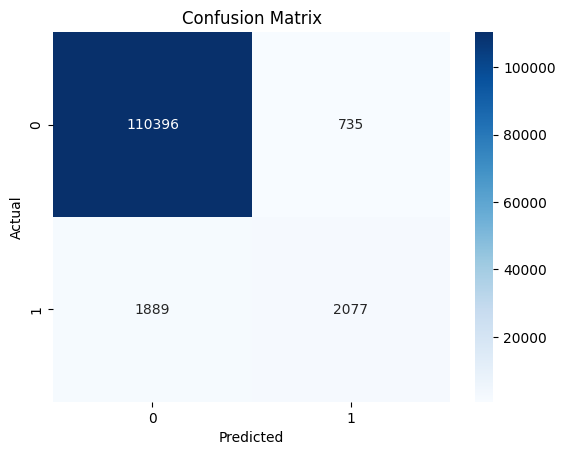

In [51]:
y_pred_prob = rf_model.predict_proba(X_val)[:, 1]

y_pred_label = (y_pred_prob >= 0.5).astype(int)

auc_score = roc_auc_score(y_val, y_pred_prob)
print(f'AUC: {auc_score}')

accuracy = accuracy_score(y_val, y_pred_label)
print(f'Accuracy: {accuracy}')

cm = confusion_matrix(y_val, y_pred_label)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [52]:
import lightgbm as lgb
from lightgbm import early_stopping
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, log_loss
cv_scores = []
callbacks = [early_stopping(stopping_rounds=200)]

train_matrix = lgb.Dataset(X_train_split, label=y_train_split)
valid_matrix = lgb.Dataset(X_val, label=y_val)

params = {
            'boosting_type': 'gbdt',
            'objective': 'binary',
            'learning_rate': 0.15,
            'metric': 'auc',
            'min_child_weight': 1e-3,
            'num_leaves': 31,
            'max_depth': -1,
            'seed': 525,
            'nthread': 8,
            'silent': True,
}

model = lgb.train(params, train_set=train_matrix, num_boost_round=20000, valid_sets=valid_matrix,callbacks=callbacks)
val_pred = model.predict(X_val, num_iteration=model.best_iteration)

cv_scores.append(roc_auc_score(y_val, val_pred))
print(cv_scores)

print("lgb_scotrainre_list:{}".format(cv_scores))
print("lgb_score_mean:{}".format(np.mean(cv_scores)))
print("lgb_score_std:{}".format(np.std(cv_scores)))

[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Info] Number of positive: 443773, number of negative: 443773
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.126341 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 34944
[LightGBM] [Info] Number of data points in the train set: 887546, number of used features: 151
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[2997]	valid_0's auc: 0.951692
[0.9516923274818528]
lgb_scotrainre_list:[0.9516923274818528]
lgb_score_mean:0.9516923274818528
lgb_score_std:0.0


AUC: 0.9516923274818528
Accuracy: 0.9829187554845044


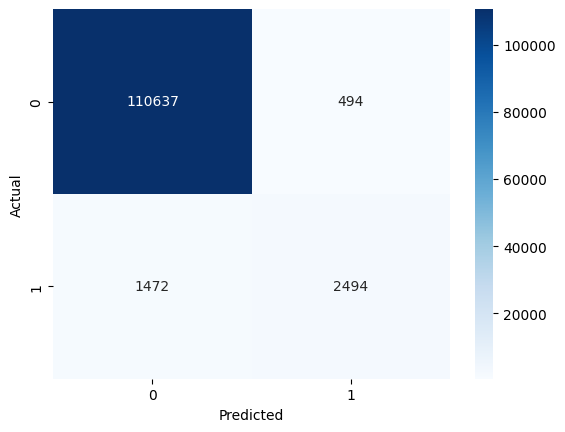

In [53]:
y_pred = model.predict(X_val, num_iteration=model.best_iteration)

y_pred_label = (y_pred >= 0.5).astype(int)

auc_score = roc_auc_score(y_val, y_pred)
print(f'AUC: {auc_score}')

accuracy = accuracy_score(y_val, y_pred_label)
print(f'Accuracy: {accuracy}')

cm = confusion_matrix(y_val, y_pred_label)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

AUC：0.9516923274818528


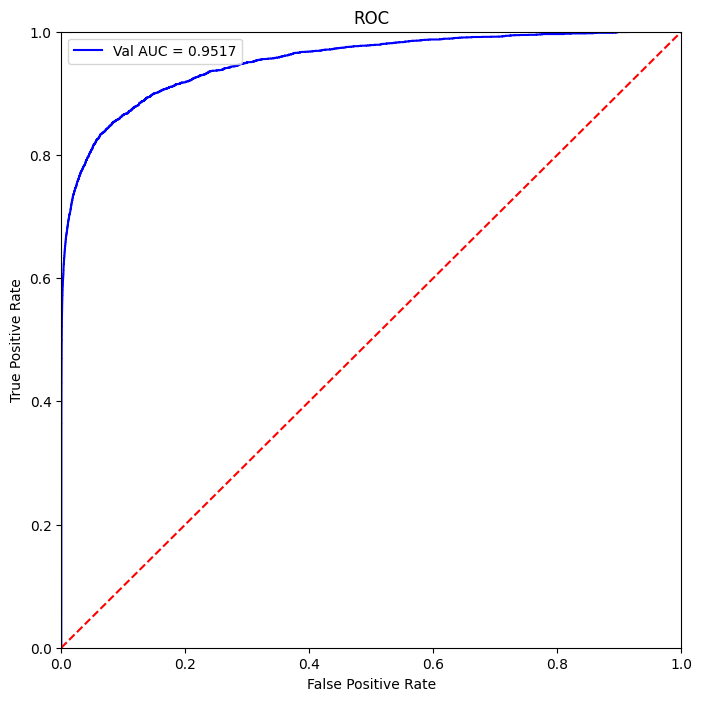

In [54]:
from sklearn import metrics
al_pre_lgb = model.predict(X_val, num_iteration=model.best_iteration)
fpr, tpr, threshold = metrics.roc_curve(y_val, val_pred)
roc_auc = metrics.auc(fpr, tpr)
print('AUC：{}'.format(roc_auc))

plt.figure(figsize=(8, 8))
plt.title('Validation ROC')
plt.plot(fpr, tpr, 'b', label = 'Val AUC = %0.4f' % roc_auc)
plt.ylim(0,1)
plt.xlim(0,1)
plt.legend(loc='best')
plt.title('ROC')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.plot([0,1],[0,1],'r--')
plt.show()

In [55]:
false_positives = X_val[(y_val == 0) & (y_pred_label == 1)]
false_negatives = X_val[(y_val == 1) & (y_pred_label == 0)]

print(f"False Positives (Predicted Fraud, Actual Not Fraud): {len(false_positives)}")
print(f"False Negatives (Predicted Not Fraud, Actual Fraud): {len(false_negatives)}")

False Positives (Predicted Fraud, Actual Not Fraud): 494
False Negatives (Predicted Not Fraud, Actual Fraud): 1472


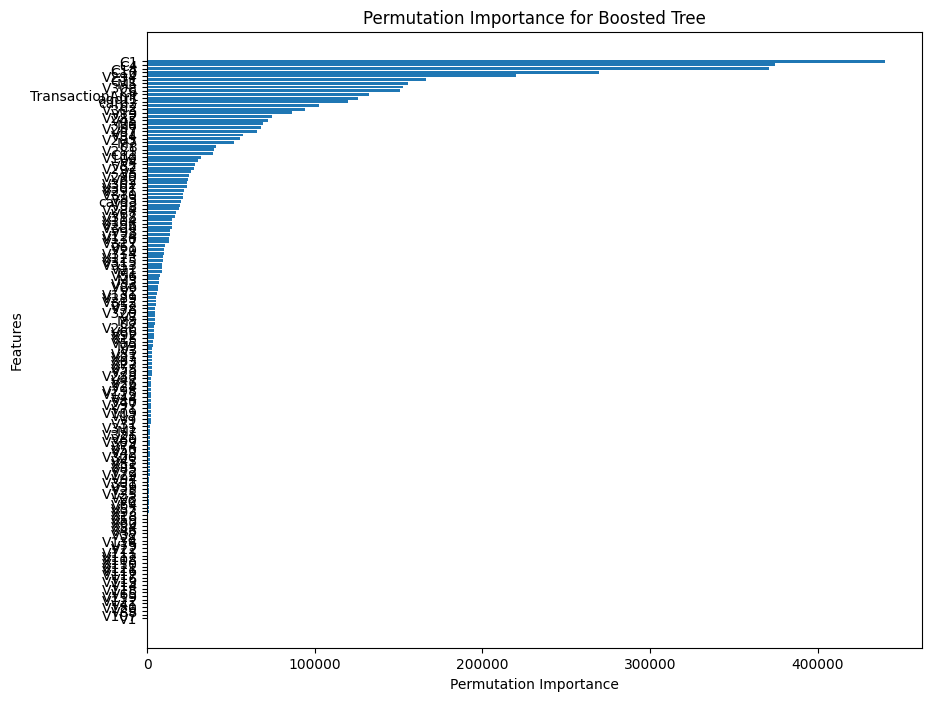

In [56]:
importance = model.feature_importance(importance_type='gain') 
feature_names = X_train_split.columns

import pandas as pd
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Permutation Importance')
plt.ylabel('Features')
plt.title('Permutation Importance for Boosted Tree')
plt.gca().invert_yaxis()
plt.show()

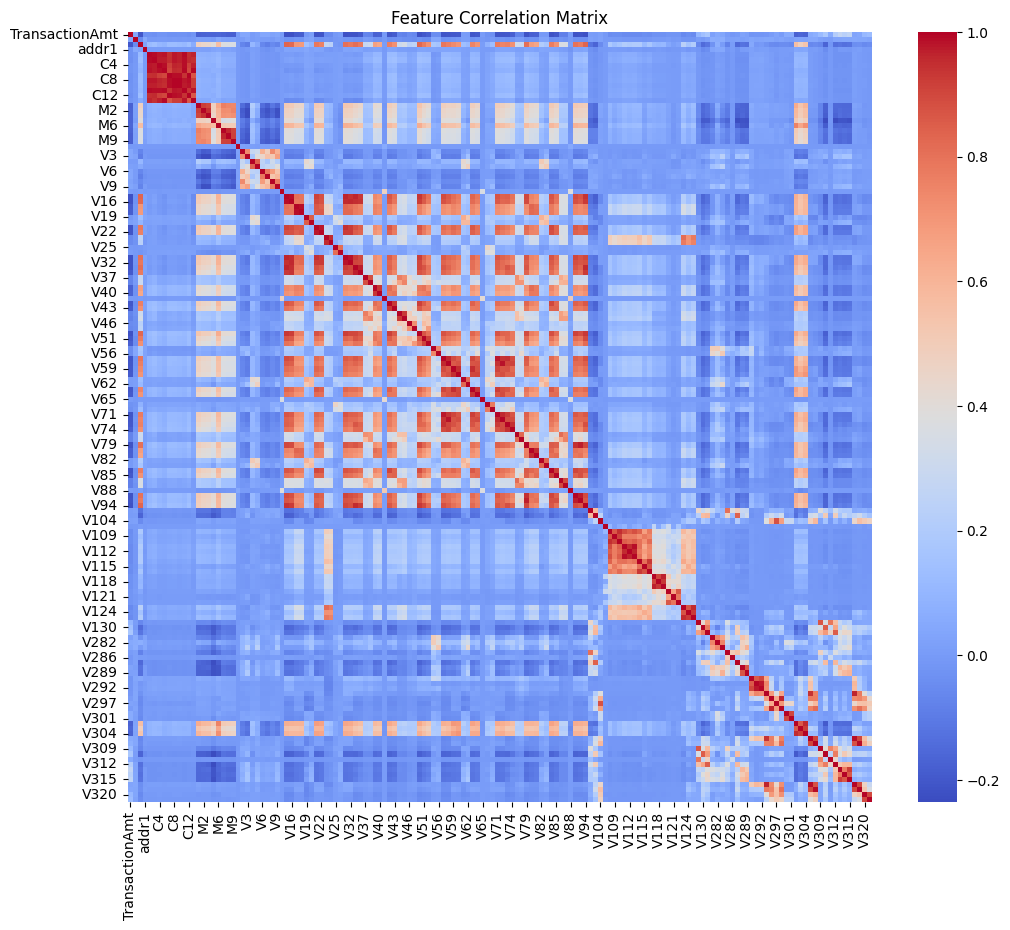

In [57]:
correlation_matrix = X_train_split.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', cbar=True)
plt.title('Feature Correlation Matrix')
plt.show()